# Opossum Complex
A synthetic data generator for causal impact and uplift analysis.

We are setting out to make a dataset that is big (1M), has a ton of features (250), a low response rate (1%), moderate lift effect from treatment.

In [1]:
from opossum import UserInterface
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

## Settings
150 features will be continuous
100 features will be categorical (40% binary, 30% 3 levels, 20% 5 levels, 10% 50 levels)

Assignment to exposure of advertisement (treatment) will be random at a probably of 85%

The intensity of the lift will be strong (8 on a scale of 10)

Feature options.
 - 70% of features are noise
 - 25% of the features will have a positive effect
 - 5% of the features will have a negative effect

In [32]:
# number of observations N and number of covariates k
N = 1000000
k = 250

# initilizing class
u = UserInterface(N, k, seed=847, categorical_covariates = [100,[2,3,5,50,2,3,5,2,3,2]])

# assign treatment and generate treatment effect inside of class object
u.generate_treatment(random_assignment = True, 
                     assignment_prob = 0.85, 
                     treatment_option_weights = [0,0,0.15,0.10,0.70,.05], 
                     intensity = 8)

This will generate the needed output as four objects.
 - X contains the features
 - y contains the outcome
 - assignment represents if they were exposed to treatment
 - treatment represents the effect of treatment

In [33]:
# Creating continuous y with partial nonlinear relation 
    #X contains the features, y contains the outcome,
    #assignment represents if they were exposed to treatment
y, X, assignment, treatment = u.output_data(binary=False, x_y_relation = 'partial_nonlinear_interaction')

In [34]:
sim_data_X = pd.DataFrame(X)
sim_data_y = pd.DataFrame(y)
sim_data_assign = pd.DataFrame(assignment)
sim_data_treat = pd.DataFrame(treatment)

In [35]:
sim_data_X = sim_data_X.rename(columns=lambda s: 'feature_'+str(s))
sim_data_y = sim_data_y.rename(columns={0:'response_cont'})
sim_data_assign = sim_data_assign.rename(columns={0:'exposed'})
sim_data_treat = sim_data_treat.rename(columns={0:'true_lift'})

In [36]:
sim_data = pd.merge(sim_data_X, sim_data_y, left_index=True, right_index=True)
sim_data = pd.merge(sim_data, sim_data_assign, left_index=True, right_index=True)
sim_data = pd.merge(sim_data, sim_data_treat, left_index=True, right_index=True)
sim_data.sample(25)

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_243,feature_244,feature_245,feature_246,feature_247,feature_248,feature_249,response_cont,exposed,true_lift
674832,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,...,0.034138,0.423180,0.201064,-0.700864,-0.110942,0.478145,-0.039237,41.075333,1,0.000000
866367,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-0.063611,-0.025611,-0.449210,-0.134632,-0.115206,0.261736,-0.216910,39.474032,1,0.000000
362539,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0.026745,-0.203703,0.539746,0.094995,-0.503605,0.368084,0.129993,35.736967,0,0.000000
149883,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,-0.180254,-0.603733,-0.456253,-0.336171,-0.077450,-0.196060,-0.171639,45.916820,0,0.000000
685099,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.333034,0.639237,-0.006057,-0.308049,-0.553943,-0.316189,0.406983,47.052011,0,-0.000000
642064,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,-0.354772,-0.258509,0.187473,-0.254328,-0.156524,0.507969,0.654795,44.408809,0,0.000000
714110,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.381601,-0.305878,0.029645,0.088097,-0.020462,0.054835,-0.043313,44.510784,0,0.000000
825971,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,-0.071273,-0.350220,0.321529,-0.301428,0.412869,-0.591842,0.162527,42.454651,1,0.000000
337252,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,-0.349544,0.040564,-0.087924,-0.435823,0.469910,0.371128,0.331867,38.721514,0,0.000000
480807,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.007168,0.338803,0.331414,0.172407,0.159509,0.122335,-0.126994,42.117475,1,0.000000


## Binary Response

We will have a binary response built on the top 1 percentile of the response cont field

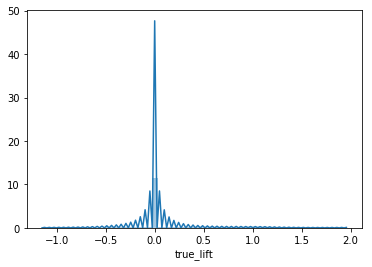

In [37]:
sns.distplot(sim_data[sim_data['exposed']==1]['true_lift']);

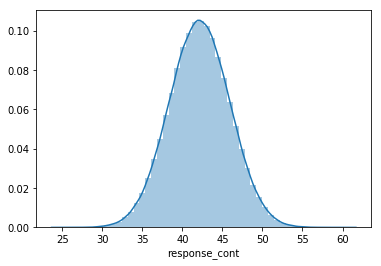

In [38]:
sns.distplot(sim_data['response_cont']);

In [22]:
sim_data['conversion'] = 0
sim_data['conversion_sale'] = 0
sim_data.loc[sim_data['response_cont'] < sim_data['response_cont'].quantile(q=.99), 'conversion'] = 0
sim_data.loc[sim_data['response_cont'] >= sim_data['response_cont'].quantile(q=.99), 'conversion'] = 1
sim_data.loc[sim_data['conversion'] == 1, 'conversion_sale'] = round(sim_data['response_cont']*100,2)

In [ ]:
filepath = ('/nas/isg_prodops_work/stemr/2020/2020_03 - Capstone Project/')
sim_data.to_csv(filepath + 'opossum_sim_complex_1m.csv', index=False)

In [ ]:
sim_data_sample = sim_data.sample(100)
sim_data_sample.to_csv(filepath + 'opossum_sim_complex_samp.csv', index=False)